# Project 1: Customer Database
**This is the first of three mandatory projects to be handed in as part of the assessment for the course 02807 Computational Tools for Data Science at Technical University of Denmark, autumn 2019.**

#### Practical info
- **The project is to be done in groups of at most 3 students**
- **Each group has to hand in _one_ Jupyter notebook (this notebook) with their solution**
- **The hand-in of the notebook is due 2019-10-13, 23:59 on DTU Inside**

#### Your solution
- **Your solution should be in Python**
- **For each question you may use as many cells for your solution as you like**
- **You should document your solution and explain the choices you've made (for example by using multiple cells and use Markdown to assist the reader of the notebook)**
- **You should not remove the problem statements, and you should not modify the structure of the notebook**
- **Your notebook should be runnable, i.e., clicking [>>] in Jupyter should generate the result that you want to be assessed**
- **You are not expected to use machine learning to solve any of the exercises**
- **You will be assessed according to correctness and readability of your code, choice of solution, choice of tools and libraries, and documentation of your solution**

## Introduction
Your team has been hired by the company X as data scientists. X makes gadgets for a wide range of industrial and commercial clients.

As in-house data scientists, your teams first task, as per request from your new boss, is to optimize business operations. You have decided that a good first step would be to analyze the companys historical sales data to gain a better understanding of where profit is coming from. It may also reveal some low hanging fruit in terms of business opportunities.

To get started, you have called the IT department to get access to the customer and sales transactions database. To your horror you've been told that such a database doens't exist, and the only record of sales transactions is kept by John from finance in an Excel spreadsheet. So you've emailed John asking for a CSV dump of the spreadsheet...

In this project you need to clean the data you got from John, enrich it with further data, prepare a database for the data, and do some data analysis. The project is comprised of five parts. They are intended to be solved in the order they appear, but it is highly recommended that you read through all of them and devise an overall strategy before you start implementing anything.

## Part 1: Cleaning the data
John has emailed you the following link to the CSV dump you requested.

- [transactions.csv](https://raw.githubusercontent.com/patrickcording/02807-comp-tools/master/docker/work/data/transactions.csv)

It seems as though he has been a bit sloppy when keeping the records. 

In this part you should:
- Explain what the data is
- Clean it to prepare it for inserting into a database and doing data analysis 

---
### Solution

# Part 1
In this part we clean the data from the csv file. This is done by evaluating each column/feature by itself. E.g. we start by evaluating the 'Part' column of the data. 

When evaluating each feature, we start with markdown cell, where we describe how we have explored the data and which problems we have found. Hereafter, we have a code cell where we fix the errors using python.

Primarily we have ushed bash commands to examine the data and python to fix it. However, in few cases we examined the data directly in python by using the print command (this code is removed from code cells now). 

Even though we evaluate the data column by column, we found that errors regarding the columns 'company', 'country' and 'city' have a relation. E.g. if one of these columns are missing the value can often be inferred by knowing the two others. Therefore, these three columns are evaluated together.

Choosing this approach, we deem that the report and code should be easier to read. 
However, this solution requires us to iterate over the data for each column we want to fix something in.
This is unnecessary, and lead to a slower solution when cleaning the data.

However, since we only execute the code once (after the data is cleaned, it is clean) we have deemed the readability more important than the performance. 

Initially, we start by importing necessary libaries and data: 

In [1]:
# Importing the necessary libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import requests as req
import sqlite3

#we assume transactions.csv is placed in same directory as this project
df = pd.read_csv("transactions.csv", encoding='utf-8-sig')

### Part
The Part feature seems to be a partnumber (string). To investigate the purity and nature of the data, the following command revealed a good indication:

'cut -d , -f 1 transactions.csv | sort | uniq -c'

The command shows:
    - majority of part numbers were used around 200 times
    - 10 records countained an empty part number
    - some part numbers are empty
    - The part numbers which were not empty, had format: 4 or 5 digits followed by '-' followed by 3 or 4 digits
    - In total there are 100 different part numbers (excluding the empty part number)

By the nature of a part number, we cannot infer a part number from remaining data. Thus, we are not able to provide correct part numbers for rows with empty part numbers. It is not possible to infer the part number from the price, since it seems like rows with the same part number don't necessarily have the same price. Therefore, no cleanup is made for the 'Part' feature

### Company
This seems to be a company name (string). To analyse the purity/nature following command was used:

'cut -d , -f 2 transactions.csv | sort | uniq -c'

The command revealed: 
     - 35 different companies exist. However, some of these are spelling errors (e.g. 'Ntagz' for 'Ntags')
     - Since the command displays all different companies in differnet order, it is fairly easy to see spelling errors
     - Most appearing company is 'Thoughtmix' which appears 2795 times (spelling errors of Thoughtmix not included)
     - Apart from spelling errors there seem to be 3 outliers: '-', 'a', 'aa' which all appear a single time
     - Spelling errors only appear in a few rows, e.g. error of 'Thoughtmix': 'Thoughtmixz' only appeared once

### Country
This seems to be the country, where the company is placed (string). To analyse the purity/nature following command was used:

'cut -d , -f 3 transactions.csv | sort | uniq -c'

The command revealed:
    - 14 different countries were listed (3 were spelling errors, e.g. 'US' in stead of 'United States' 
    - The 'empty' country appeared 2171 times so it seems like John forgot to note the company many times
    - One spelling error is 'Germany' listed in danish: 'Tyskland'
    - The spelling errors and the list of 'Tyskland' only appears in few rows (<5) while countries typically appear in > 1000 rows (except from Japan and Netherlands)

### City 
This seems to be the city, where the company is placed (string). To analyse the purity/nature following command was used:

'cut -d , -f 4 transactions.csv | sort | uniq -c'

The command reveals:
    - This gives 31 different cities
    - The whitespace city appear 33 times (John was a bit better at noting cities down)
    - There seems to be no spelling mistakes, however the cities 'Vila Fria' and 'Monção' only appear in a single row


### Fixing Issues for Company/Country/Cities
To fix issues for column: 'company', 'country', 'city' (including many empty countries), following command is useful:

'cut -d , -f 2-4 transactions.csv | sort | uniq -c'

A part of the result for this query is: 
     - 2    Brainsphere,,
     - 122  Brainsphere,,Braga
     - 1    Brainsphere,Portuga,Braga
     - 2    Brainsphere,Portugal,
     - 1114 Brainsphere,Portugal,Braga
     - 1    Brainsphere,Portugal,Monção
     
Here, it can easily be seen that the correct location for Brainsphere is : 'Brainsphere,Portugal,Braga' (also based on number of appearences). This can be used to infer missing values/correct false data - even for the line only indicating the company (this only appears two times, so it doesn't seem realisticly that another officy should exist). This can also be used to fix the line containing 'Monção', since it seems like a mistake, to only be used once.

The same method can be used for the remaining companies/countries/cities, so empty data can be inferred. It is even possible to infer the real data for the three company outliers '-', 'a', 'aa'. Both these lines list cities, which are only used by one company. Thus the company for these lines can be set to that exact comapny.

The above comman also shows that every company is only located in one city, but for 'Flipstorm' which is both located in Athens and Nanterre.

For more details see code comments:

In [2]:
##iterate over all rows to fix errors found examining the data in bash (described above)    
for index, row in df.iterrows():
    
    #lines including Avaveo only have missing/wrongcountry
    if (row['company'] == 'Avaveo' and row['country']!='France'):
        row['country'] = 'France'
    
    #lines including 'Brinasphere' can both have missing/wrong country and missing/wrong city
    elif (row['company'] == 'Brainsphere'):
        if(row['country']!= 'Portugal'):
            row['country'] = 'Portugal'
        if(row['city']!='Braga'):
            row['city'] = 'Braga'
    
    #lines only have missing/wrong country
    elif(row['company']== 'Bubblemix' and row['country'] !='Japan'):
        row['country'] = 'Japan'
        
    #lines only have missing/wrong country
    elif(row['company']=='Buzzbean' and row['country'] != 'Germany'):
        row['country'] = 'Germany'
        
    #lines only have missing/wrong country
    elif(row['company']=='Chatterbridge' and row['country']!= 'Spain'):
        row['country']='Spain'
    
    #lines only have missing/wrong country
    elif(row['company']=='Eimbee' and row['country']!= 'France'):
        row['country']='France'

    #lines can both have missing/wrong country and missing/wrong city
    elif(row['company']=='Flipstorm'):
        if(row['city'] == 'Athens' and row['country'] != 'Greece'):
            row['country']='Greece'
        if(row['city'] == 'Nanterre' and row['country'] != 'France'):
            row['country']='France'
   
    #lines only have missing/wrong country    
    elif(row['company']=='Gabcube' and row['country']!= 'Portugal'):
        row['country']='Portugal'    

    #lines only have missing/wrong country
    elif(row['company']=='Gabtune' and row['country']!= 'France'):
        row['country']='France'

    #lines only have missing/wrong country    
    elif(row['company']=='Gevee' and row['country']!= 'France'):
        row['country']='France'

    #lines only have missing/wrong country
    elif(row['company']=='Innojam' and row['country']!= 'Netherlands'):
        row['country']='Netherlands'
    
    #lines can both have missing/wrong country and missing/wrong city
    elif(row['company']=='Kanoodle'):
        if(row['country']!= 'Netherlands'):
            row['country']='Netherlands'
        if(row['city']!='Niihama'):
            row['city']='Niihama'
    
    #this line is to fix single row which listed Lajo as Laj0
    elif(row['company'] == 'Laj0'):
        row['company'] = 'Lajo'
    
    #lines only have missing/wrong country    
    elif(row['company']=='Lajo' and row['country']!= 'Greece'):
        row['country']='Greece'
    
    #lines only have missing/wrong country
    elif(row['company'] == 'Ntagz'):
        row['company'] = 'Ntags'
    
    #lines can both have missing/wrong country and missing/wrong city
    elif(row['company']=='Ntags'):
        if(row['country']!= 'Portugal'):
            row['country']='Portugal'
        if(row['city']!='Lisbon'):
            row['city']='Lisbon'
    
    #lines only have missing/wrong country
    elif(row['company']=='Realpoint' and row['country']!= 'Portugal'):
        row['country']='Portugal'

    #lines only have missing/wrong country    
    elif(row['company']=='Thycero' and row['country']!= 'France'):
        row['country']='France'
    
    #lines only have missing/wrong country
    elif(row['company']=='Riffpath' and row['country']!= 'Greece'):
        row['country']='Greece'
    
    #lines only have missing/wrong country
    elif(row['company']=='Roodel' and row['country']!= 'Portugal'):
        row['country']='Portugal'
    
    #lines can both have missing/wrong country and missing/wrong city
    elif(row['company']=='Shufflebeat'):
        if(row['country']!= 'Portugal'):
            row['country']='Portugal'
        if(row['city']!='Porto'):
            row['city']='Porto'
    
    #lines only have missing/wrong country
    elif(row['company']=='Tagtune' and row['country']!= 'Switzerland'):
        row['country']='Switzerland'
    
    #lines can both have missing/wrong country and missing/wrong city
    elif(row['company']=='Teklist'):
        if(row['country']!= 'Netherlands'):
            row['country']='Netherlands'
        if(row['city']!='Arnhem'):
            row['city']='Arnhem'

    #lines only have missing/wrong country        
    elif(row['company'] == 'Thoughtmixz'):
        row['company'] = 'Thoughtmix'
    
    #lines can both have missing/wrong country and missing/wrong city
    elif(row['company']=='Thoughtmix'):
        if(row['country']!= 'Portugal'):
            row['country']='Portugal'
        if(row['city']!='Amadora'):
            row['city']='Amadora'
    
    #lines can both have missing/wrong country and missing/wrong city
    elif(row['company']=='Twitterbeat'):
        if(row['country']!= 'France'):
            row['country']='France'
        if(row['city']!='Annecy'):
            row['city']='Annecy'
    
    #lines only have missing/wrong country        
    elif(row['company']=='Voomm' and row['country']!= 'France'):
        row['country']='France'
    
    #lines can both have missing/wrong country and missing/wrong city
    elif(row['company']=='Wordify'):
        if(row['country']!= 'United States'):
            row['country']='United States'
        if(row['city']!='New York'):
            row['city']='New York'

    #lines can both have missing/wrong country and missing/wrong city        
    elif(row['company']=='Yozio'):
        if(row['country']!= 'Greece'):
            row['country']='Greece'
        if(row['city']!='Patras'):
            row['city']='Patras'
    
    #lines can both have missing/wrong country and missing/wrong city
    elif(row['company']=='Zoonder'):
        if(row['country']!= 'United States'):
            row['country']= 'United States'
        if(row['city']!='Boston'):
            row['city']='Boston'
    
    #lines only have missing/wrong country
    elif(row['company'] == 'Zooxo.'):
        row['company'] = 'Zooxo'        
    
    #lines can both have missing/wrong country and missing/wrong city
    elif(row['company']=='Zooxo'):
        if(row['country']!= 'United Kingdom'):
            row['country']= 'United Kingdom'
        if(row['city']!='London'):
            row['city']='London'
    
    #We set company for typo'ed companies based on their location (NY and Boston)
    #Since there is only one company we sell to in new york and one company in Boston
    elif(row['company'] == ' -'): #this line lists Boston. Only company in Boston is Zoonder
        row['company'] = 'Zoonder'
        
    elif(row['company'] == ' a'): #this line lists New York. Only company in Boston is Wordify
        row['company'] = 'Wordify'
        
    elif(row['company'] == 'aa'): #this line lists New York. Only company in Boston is Wordify
        row['company'] = 'Wordify'

### Price
This column indicates the price for the transaction. To investigate the purity/nature of the data a command similar to the others were executed: 

'cut -d , -f 5 transactions.csv | sort | uniq -c | wc -l'

However, this shows that more than 19000 different price values exist. Therefore, we took another approach and wanted to inspect which char the prices started with using command:

'cut -d , -f 5 transactions.csv | cut -c 1-1 | sort | uniq -c'

The command shows that many lines start with the monetary values $, £, ¥ and values from 1-9. Also many lines start with a '-', probably indicating negative values. A few mistakes seemed to be in there: 'p', ' ', and 'n'. These values cound be further inspected by commands like: 

'cut -d , -f 5 transactions.csv | grep n'

This revealed following problems with data: 
    - two rows have value 'void'
    - Three rows have value 'na'
    - five lines have value '-'
    - negatives lines appears in euros with trailing € sign:  e. g. '-121.28€' while dollars and rest have sign as prefix: '$-22.66'.
    
The last point is also the case for positive values. 

We now investigate two possible errors: no currency sign or multiple currency sign. The no currency sign was investigated using:

"cut -d , -f 5 transactions.csv | egrep -v '[$£¥€]'"

Which revealed preivoulsy listed errors and four prices not having any currency sign. 
 
"cut -d , -f 5 transactions.csv | egrep '[$£¥€].*[$£¥€]'" - the line contains dollar sign to, but when this box is evaluated it is not showing.

The command Revealed that no line had a price with more than one currency sign

We chose to set price of rows with values 'na'/'void'/'-' to 0. Another approach would have been to set it to median or average value. 

Examining the use of the currencies we can see that € appear far more often than other currencies. Therefore, we have chosen € as currency for the value without any currencies. 

These solutions are implemented below: 

In [3]:
for index, row in df.iterrows(): #iterate over all rows
    if (row['price'] == 'na' or row['price'] == '-' or row['price'] == 'void' or not isinstance(row['price'],str)):
        row['price']=0 #find outliers and set their value to 0
    else:
        contain_currency = 0 #find values without currency
        if (not '€' in row['price']): 
            contain_currency = 1
        if ('$' in row['price']):
            contain_currency = 1
        if ('£' in row['price']):
            contain_currency = 1
        if ('¥' in row['price']):
            contain_currency = 1
        if(contain_currency==0):
            row['price']=row['price']+'€' #assume default value is € if none is declared 

### Date
This seems to be the date for the transaction, consisting of a date and a specific time (hours, minutes, seconds).


The following query was made to examine the data:


'cut -d , -f 6 transactions.csv | sort | uniq -c | head'

The query revealed one date formatted as dd/mm/yyyy and all remaining rows had format 'yyyy:mm:dd HH:MM:SS'. All results for tail command also had latter format. To inspect time parameter further, we used query:
 
'cut -d , -f 6 transactions.csv | cut -d ' ' -f 2 | sort | uniq -c | head' - also with tail

From the query it seems like almost every date value also include timestamp. 9 Rows had timestamp value '' thus having no timestamp. The query also showed that the timestamps were disitrbutted between 00:00:00 and 23:59:59, as expected. 

To conclude second value in timestamp e.g. ':HH:' is in fact hours we insepcted data using query:

'cut -d , -f 6 transactions.csv | cut -d ' ' -f 1 | cut -d '-' -f 2 | sort | uniq -c '

To clean up the date we add a timestamp (00:00:00) to columns without any and convert one row with value '10/04/2017' into correct format. 

When importing the data into python date_times (part 2) we got exception for two values, which had day '32' listed. Since no month has date '32' we converted these to day 30, since both were in June.

In [4]:
for index, row in df.iterrows():#iterate all rows
    if (row['date'].startswith('10/04/2017')): 
        row['date']='2017-04-10' #translate single date with wrong format to correct date format
    if (row['date'].startswith('2016-06-32 07:22:28')):
        row['date']='2016-06-30 07:22:28' #change date with too large date value
    if (row['date'].startswith('2016-06-32 08:08:48')):
        row['date']='2016-06-30 08:08:48'#change date with too large date value

    try: #try read lines with formay yyyy-mm-dd and convert them to format yyyy-mm-dd HH:MM:SS
        #some dates without HH:MM:SS have trailing whitespace, so we strip here
        date = row['date'].strip() #strip for mig
        t = datetime.strptime(date, "%Y-%m-%d") #
        row['date']=t.strftime('%Y-%m-%d %H:%M:%S')
    except: #in case the line did not h
        try: #This let us print out an error message in case there exist a timestamp not matching desired format
            t = datetime.strptime(row['date'], "%Y-%m-%d %H:%M:%S")
        except:
            print('Error converting time for transaction ' +  row['company'] + " " + row['date']) #used for debugging
    

---
## Part 2: Enriching the data

A common task for a data scientists is to combine or enrich data from internal sources with data available from external sources. The purpose of this can be either to fix issues with the data or to make it easier to derive insights from the data.

In this part you should enrich your data with data from at least one external source. You may look to part 4 for some  inspiration as to what is required. Your solution should be automated, i.e., you can not ask the reader of your notebook to download any data manually. You should argue why and what you expect to achieve by the enrichments you are doing.

---
### Solution

## Decribe required enrichment
In section 4 we have to compare the profit between companies. To do so, we should calculate all prices to use same currency, such that price of every transaction can be compared with the price of any other transaction.


In [5]:
#invoke rest api for exchange rates
resp = req.get("https://api.exchangeratesapi.io/history?start_at=2016-01-02&end_at=2019-05-14&symbols=USD,GBP,JPY")

# Read it as json
json = resp.json()
rate = json['rates']

# make a data frame (cdf: currency data frame)
cdf = pd.DataFrame.from_dict(rate)

def get_eur_exchange_ratio(currency, date):
    date_time_obj = datetime.strptime(date, "%Y-%m-%d %H:%M:%S")
    i=0
    exchange_ratio = 0
    while (exchange_ratio == 0):    
        try:
            exchange_ratio = cdf.at[currency,date_time_obj.strftime('%Y-%m-%d')]
        except: 
            date_time_obj = date_time_obj + timedelta(1); #try next day
            i+=1
            if(i>20): #To ensure we max try 20 days into the future, used for debugging
                print("Error displaying currency: ", currency, "date: ", date, 'datetime ', date_time_obj)
                return -1
                
    return exchange_ratio               

def get_eur_price(currency,original_value,date): #Currency is here expected in cents (int)
    conversion_rate = get_eur_exchange_ratio(currency, date) #get conversion rate from data frame 
    eur_value = original_value/conversion_rate #apply conversion rate to get eur cent value
    return int(round(eur_value))     #We round to ensure we get to nearest full 'cent'

#This function gives string value, that currency is listed as in data frame for exchange rates
#e.g. € is listed as 'EUR'
def get_currency_string_from_price_string(price_string):
    if('€' in price_string) :
        return 'EUR'
    elif('$' in price_string) : 
        return 'USD'
    elif('£' in price_string): 
        return 'GBP'
    elif('¥' in price_string):     #ASSUMED THAT ¥ is Japanese Yen 
        return 'JPY'

#convert from 'euro.cents' format to two last digits in int declaring cents and any digit before than declaring euros
#e.g. '2732' is interpreted as 27 euro and 32 cents
def get_price_as_int(price):
    #print('_: ' + price)
    pricestrings = price.split('.') #divide between euros and cents
    priceint = int(pricestrings[0]) * 100 #multiply euro value by 100 
    #print('1: ' + str(priceint))
    if (pricestrings[0].startswith('-')): 
        priceint -= int(pricestrings[1]) #if eur value is negative we need to subtract the cents from current value
    else:
        priceint += int(pricestrings[1])
    #print('2: ' + str(priceint))
    return priceint
   

#this loops iterates rows in dataframe from csv
#for each row we exchange price value to EUR and save it back to dataframe as an int declaring eur as cents
#e.g. if exchange rate from usd to eur is 2:1 and we receive '$2.34' we save '117'
translation_table = dict.fromkeys(map(ord, '$€£¥'), None)
for index, row in df.iterrows():
    if (row['price']==0): #we ignore rows equal to zero. They have no currency and are already represented as eur cents
        continue
        
    currency_string = get_currency_string_from_price_string(row['price']) #get currency string used in data frame object
    price_without_currency = row['price'].translate(translation_table) #Remove currency symbol/char from price
    price_int = get_price_as_int(price_without_currency) #sconvert to int, cent format
    
    if(currency_string == 'EUR'): #if already in EUR currency , we just use value right away we need no exchange 
        eur_price = price_int 
    else: #If not in EUR we exchange using dataframe from external api
        eur_price = get_eur_price(currency_string, price_int, row['date']) #Calculate price in EUR
    row['price'] = eur_price #save

---
## Part 3: Creating a database
Storing data in a relational database has the advantages that it is persistent, fast to query, and it will be easier access for other employees at Weyland-Yutani.

In this part you should:
- Create a database and table(s) for the data
- Insert data into the tables

You may use SQLite locally to do this. You should argue why you choose to store your data the way you do. 

---
### Solution

In [6]:
#Connect to the database and create tables
conn = sqlite3.connect('weylandYutani.sqlite')
c = conn.cursor()

c.execute('CREATE TABLE IF NOT EXISTS transactions(transaction_id INTEGER PRIMARY KEY AUTOINCREMENT, part INTEGER, price INTEGER, date_time TEXT, company_name TEXT, company_country TEXT, company_city TEXT)')
conn.commit()


## Import data into the table

for index, row in df.iterrows():
    part = row['part']
    companyName = row['company']
    companyCountry = row['country']
    companyCity = row['city']
    price = row['price']
    date_time = row['date']
    c.execute("INSERT INTO transactions(part, price, date_time,company_name, company_country, company_city) VALUES (?, ?, ?, ?, ?, ?)", (part,price,date_time,companyName,companyCountry,companyCity))
    conn.commit()


---
## Part 4: Analyzing the data
You are now ready to analyze the data. Your goal is to gain some actionable business insights to present to your boss. 

In this part, you should ask some questions and try to answer them based on the data. You should write SQL queries to retrieve the data. For each question, you should state why it is relevant and what you expect to find.

To get you started, you should prepare answers to the following questions. You should add more questions.
#### Who are the most profitable clients?
Knowing which clients that generate the most revenue for the company will assist your boss in distributing customer service ressources.

#### Are there any clients for which profit is declining?
Declining profit from a specific client may indicate that the client is disatisfied with the product. Gaining a new client is often much more work than retaining one. Early warnings about declining profit may help your boss fighting customer churn.


Remember, you are taking this to your new boss, so think about how you present the data.

---
### Solution

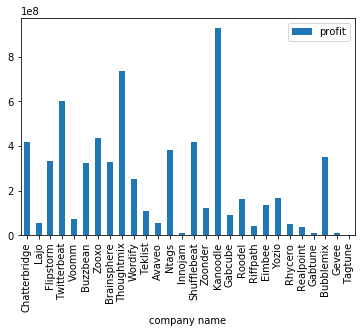

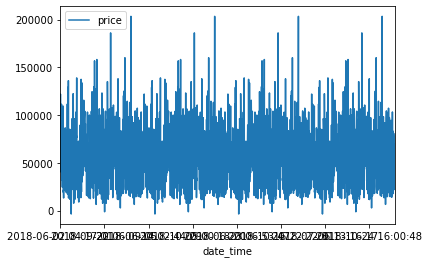

In [7]:
##The following plot shows each company and the profit that our company earned over time. 
df4 = pd.read_sql_query('SELECT price, date_time, company_name FROM transactions', conn)

companyNames = []
for index, row in df4.iterrows():
    if (row['company_name'] not in companyNames):
        companyNames.append(row['company_name'])
listOfCompanyTotal = []
listOfCompanyDevelopment = []
for companyName in companyNames:
    # The SQL query we need for 4.1
    c.execute(f"SELECT sum(price), company_name FROM transactions WHERE company_name='{companyName}' ORDER BY company_name")
    listOfCompanyTotal.append(c.fetchone())
    # We need for each company the development of price over time
    # Here it is after the 2018-06-01 20:05:00
    c.execute(f"SELECT price, date_time FROM transactions WHERE date_time>'2018-06-01 20:05:00' AND company_name='{companyName}' ")
    listOfCompanyDevelopment.append(c.fetchall())


# Define the names for the plot for 4.1    
new_name = {
    0: 'profit',
    1: 'company name'
}



# The following plot show the answer to the question: 
#.   Who are the most profitable clients?
#.   It is a plot over the companies in the x-axis and the total sum of the price for that given company on the y-axis
df4_1 = pd.DataFrame.from_dict(listOfCompanyTotal)
df4_1.rename(columns=new_name, inplace=True)
df4_1.plot(kind='bar', x="company name")

new_name2 = {
    0:'price',
    1:'date_time'
}
# The following plot show the answer to the question: 
#     Are there any clients for which profit is declining?
#     Somewhat anyways. The list "listOfCompanyDevelopment" shows the development of each company over time. 
#   It is stored such that when quering listOfCompanyDevelopment[3] you get the 3rd companys development over time. 
#.   In the SQL statement above you can change the date_time for which the query should run
df4_2 = pd.DataFrame.from_dict(listOfCompanyDevelopment[3])
df4_2.rename(columns=new_name2, inplace=True)
df4_2.head(100)
df4_2.plot(x='date_time')



---
## Part 5: Performance
Your boss is very impressed with what you have achieved in less than two weeks, and he would like to take your idea of storing the customer and sales data in a relational database to production. However, John is concerned that the solution will not scale. His experience is telling him that you will see many occurrences of the following queries.

- Show all sales to company X between time $t_1$ and time $t_2$
- Show the latest X sales in the database
- Show total sales per company per day

Show that Johns concern is not justified.

---
### Solution

It is true that with increasing number of records in the database the query time will increase. However we can index the database using the index commands. We could forexample to support the queries described above, index on companies and date time. Thus the queries would be significantly faster, even with large databases. 

The indexes can be made on any column that the boss would want. This would speed up the queries on that given data column.

Even maintaining the database would not be slower either. If the database indexing is implemented using beta-epsilon trees, we get insertions in $O(\frac{log_B N}{\epsilon B^{\epsilon}})$, where B is the block size and N is the size of the data, and $\epsilon$ is the relation between the degree of a node and the buffersize of the buffers that contain the updates. Where as if we would just use B-trees it would be $O(log_B N)$. Thus we get significantly better update times. The result is that we can actually maintain a database, while still being able to keep multiple index over the database. (See [An Introduction to Bε-trees and Write-Optimization](https://www.usenix.org/publications/login/oct15/bender)) 

---